In [2]:
import deepxde as dde
import numpy as np

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


In [3]:
def func(x):
    return x * np.sin(5 * x)

geom = dde.geometry.Interval(0, 2)

#now we have set up the function and the interval over which we are using the function.
#next we are setting up the NN 

num_train = 16
num_test = 100
data = dde.data.Function(geom, func, num_train, num_test)

activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)

Compiling model...
'compile' took 1.498337 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [5.79e-01]    [5.62e-01]    [9.91e-01]    
1000      [1.65e-05]    [2.11e-05]    [6.07e-03]    

Best model at step 1000:
  train loss: 1.65e-05
  test loss: 2.11e-05
  test metric: [6.07e-03]

'train' took 1.410648 s

Saving loss history to c:\Users\Alexa\Documents\VSCode\Research\PMRModel\LearningDeepxde\loss.dat ...
Saving training data to c:\Users\Alexa\Documents\VSCode\Research\PMRModel\LearningDeepxde\train.dat ...
Saving test data to c:\Users\Alexa\Documents\VSCode\Research\PMRModel\LearningDeepxde\test.dat ...


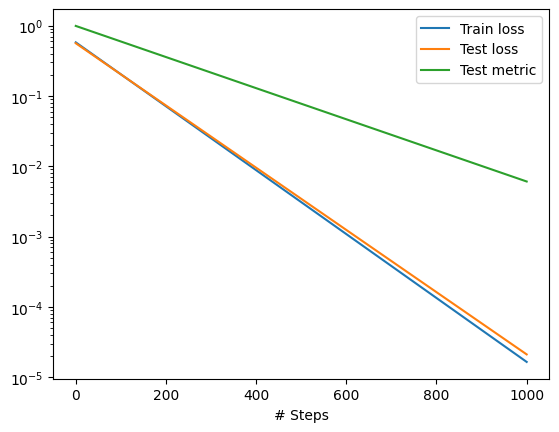

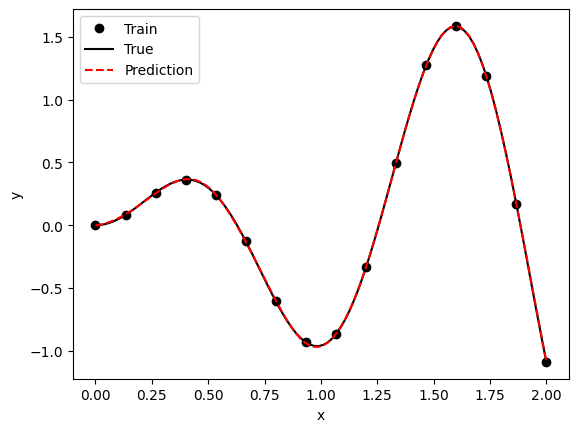

In [4]:
#now that we have setup the NN we can build a model

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

losshistory, train_state = model.train(iterations=1000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [6]:
#this is the results i guess
x = geom.uniform_points(5,True)
y_pred = model.predict(x)
print(x[-1])
print(y_pred[-1])
print(func(2))

[2.]
[-1.0882542]
-1.0880422217787395
